Сакович Мария Викторовна, 27.11.2025


# Исследовательский анализ данных о членах фитнес-клуба

Целью исследования является анализ оттока клиентов на основании имеющихся данных.

In [2]:
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt

RuntimeError: module was compiled against NumPy C-API version 0x10 (NumPy 1.23) but the running NumPy has C-API version 0xf. Check the section C-API incompatibility at the Troubleshooting ImportError section at https://numpy.org/devdocs/user/troubleshooting-importerror.html#c-api-incompatibility for indications on how to solve this problem.

In [5]:
df = pd.read_csv('https://raw.githubusercontent.com/Mariya-Sakovich/Personal_projects/main/Gym/gym_members_dataset.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Member_ID                 150 non-null    int64  
 1   Name                      127 non-null    object 
 2   Age                       137 non-null    float64
 3   Gender                    150 non-null    object 
 4   Address                   150 non-null    object 
 5   Phone_Number              150 non-null    object 
 6   Membership_Type           150 non-null    object 
 7   Join_Date                 141 non-null    object 
 8   Last_Visit_Date           150 non-null    object 
 9   Favorite_Exercise         150 non-null    object 
 10  Avg_Workout_Duration_Min  150 non-null    int64  
 11  Avg_Calories_Burned       139 non-null    float64
 12  Total_Weight_Lifted_kg    142 non-null    float64
 13  Visits_Per_Month          138 non-null    float64
 14  Churn     

Исходные данные представлены одним датасетом, состоящим из 150 строк и 14 колонок, и содержат информацию о членах фитнес-клуба, в т.ч. личные данные, тип членства, даты первого и последнего посещения фитнес-клуба, характеристики тренировок и посещений, а так же факт ухода из фитнес-клуба. 

In [ ]:
df.head()

,Member_ID,Name,Age,Gender,Address,Phone_Number,Membership_Type,Join_Date,Last_Visit_Date,Favorite_Exercise,Avg_Workout_Duration_Min,Avg_Calories_Burned,Total_Weight_Lifted_kg,Visits_Per_Month,Churn
0,1,NaN,19.0,Male,"Street 171, City 39",032-51510359,Quarterly,2022-07-23,2022-11-03,Pull-ups,93,214.0,13995.0,18.0,No
1,2,Shanza,19.0,Female,"Street 111, City 18",039-19243328,Monthly,2023-12-04,2024-02-14,Squats,37,436.0,4612.0,11.0,No
2,3,Ubaidullah,52.0,Male,"Street 69, City 21",033-60221501,Quarterly,2024-09-13,2024-12-07,Bench Press,98,523.0,3124.0,4.0,Yes
3,4,Mansoor Ahmed,52.0,Male,"Street 72, City 39",035-55527902,Monthly,2024-06-05,2025-02-24,Pull-ups,66,282.0,4586.0,24.0,No
4,5,Hanzala,32.0,Male,"Street 6, City 12",038-93946322,Monthly,2022-06-15,2022-12-02,Bench Press,32,522.0,16353.0,18.0,No


Содержимое ячеек соответствует описанию данных, типы данных в некоторых столбцах необходимо поменять:

- в столбцах `Join_date` и `Last_visit_date` - на формат даты

<!-- - в столбцах `Age`, `Avg_Calories_Burned`, `Total_Weight_Lifted_kg`, `Visits_Per_Month` - на целочисленный -->

- в столцбе `Churn` - для наглядности - в boolean 


Кроме того, для удобства переведем названия столбцов в snake_case.

In [ ]:
#переведем названия столбцов в snake_case
df.columns = df.columns.map(str.lower)

In [ ]:
df[['join_date','last_visit_date']] = df[['join_date','last_visit_date']].apply(pd.to_datetime)
#df[['age','avg_calories_burned','total_weight_lifted_kg','visits_per_month']] = df[['age','avg_calories_burned','total_weight_lifted_kg','visits_per_month']].astype(int)


In [ ]:
#Проверим уникальные значения в столбце churn
df.churn.unique()

array(['No', 'Yes'], dtype=object)

In [ ]:
#сделаем прямое булево преобразование
df['churn'] = df['churn'] == 'Yes'
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   member_id                 150 non-null    int64         
 1   name                      127 non-null    object        
 2   age                       137 non-null    float64       
 3   gender                    150 non-null    object        
 4   address                   150 non-null    object        
 5   phone_number              150 non-null    object        
 6   membership_type           150 non-null    object        
 7   join_date                 141 non-null    datetime64[ns]
 8   last_visit_date           150 non-null    datetime64[ns]
 9   favorite_exercise         150 non-null    object        
 10  avg_workout_duration_min  150 non-null    int64         
 11  avg_calories_burned       139 non-null    float64       
 12  total_weight_lifted_kg

In [ ]:
df.churn.value_counts()

churn
False    111
True      39
Name: count, dtype: int64

## Анализ пропущенных значений

In [ ]:
df.isna().sum().sort_values(ascending=False)/len(df)*100


name                        15.333333
age                          8.666667
visits_per_month             8.000000
avg_calories_burned          7.333333
join_date                    6.000000
total_weight_lifted_kg       5.333333
member_id                    0.000000
gender                       0.000000
address                      0.000000
phone_number                 0.000000
membership_type              0.000000
last_visit_date              0.000000
favorite_exercise            0.000000
avg_workout_duration_min     0.000000
churn                        0.000000
dtype: float64

Пропуски содержатся в стобцах name, age, visits_per_month, avg_calories_burned, join_date,total_weight_lifted_kg и составляют от 5 до 15%.

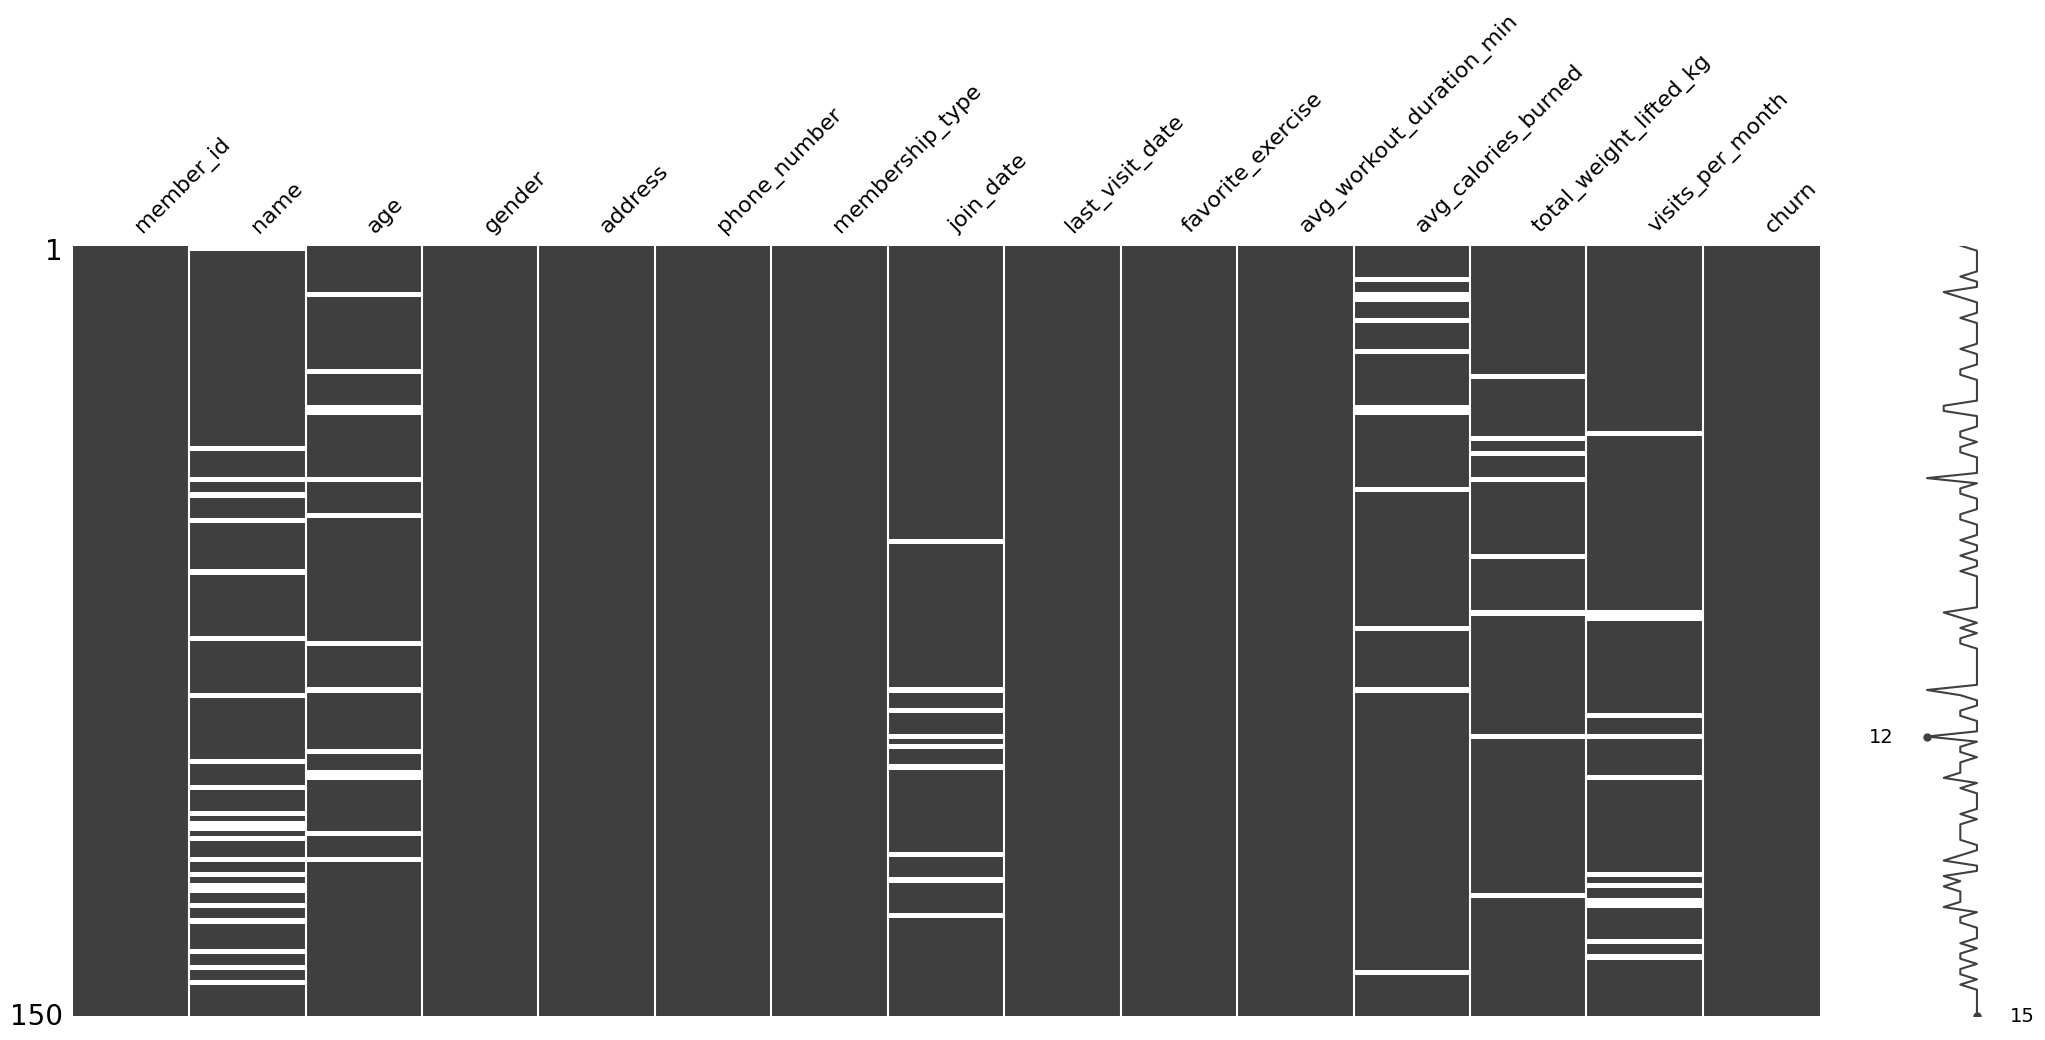

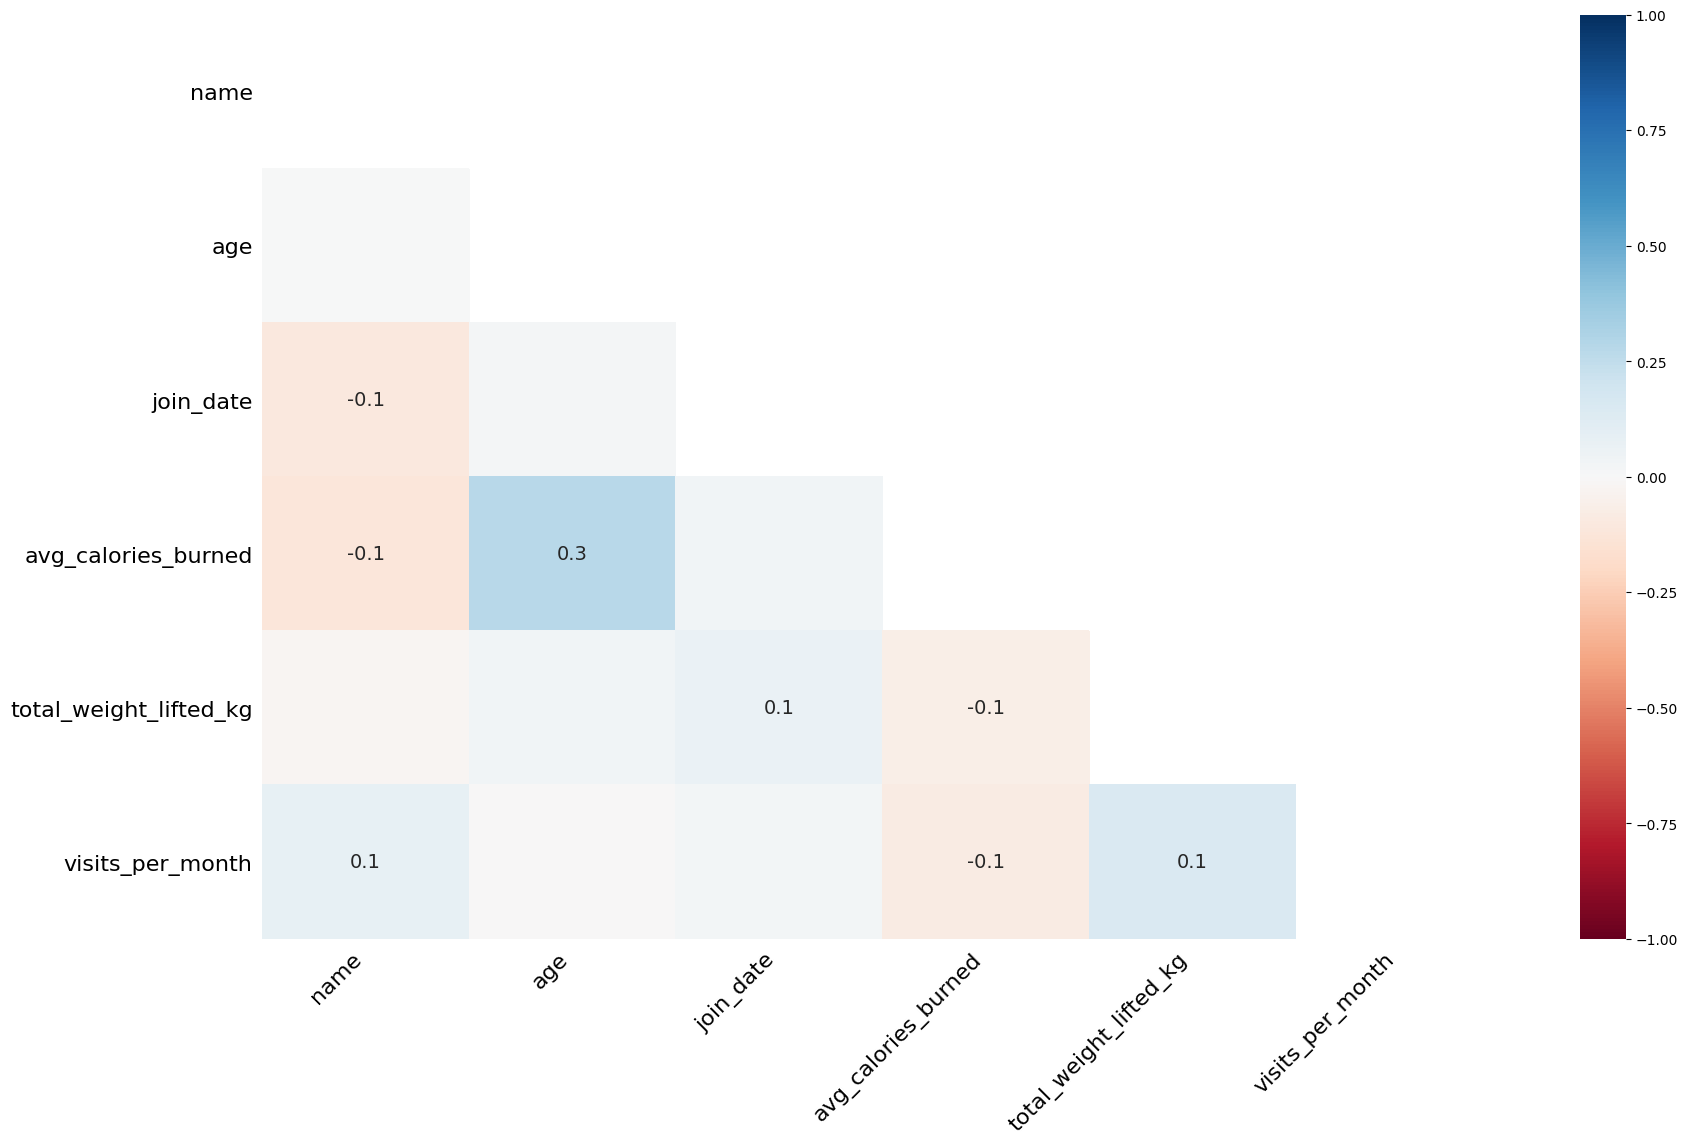

In [ ]:
#Построим матрицу пропущенных значений с помощью библиотеки missingno
msno.matrix(df)
msno.heatmap(df)
plt.show()

Проверим, есть ли связь между пропусками в данных и фактом ухода из клуба.

In [ ]:
df_former=df[df['churn']==True]
df_former.isna().sum().sort_values(ascending=False)/len(df_former)*100


name                        23.076923
visits_per_month            12.820513
join_date                   10.256410
age                          7.692308
avg_calories_burned          5.128205
total_weight_lifted_kg       5.128205
member_id                    0.000000
gender                       0.000000
address                      0.000000
phone_number                 0.000000
membership_type              0.000000
last_visit_date              0.000000
favorite_exercise            0.000000
avg_workout_duration_min     0.000000
churn                        0.000000
dtype: float64

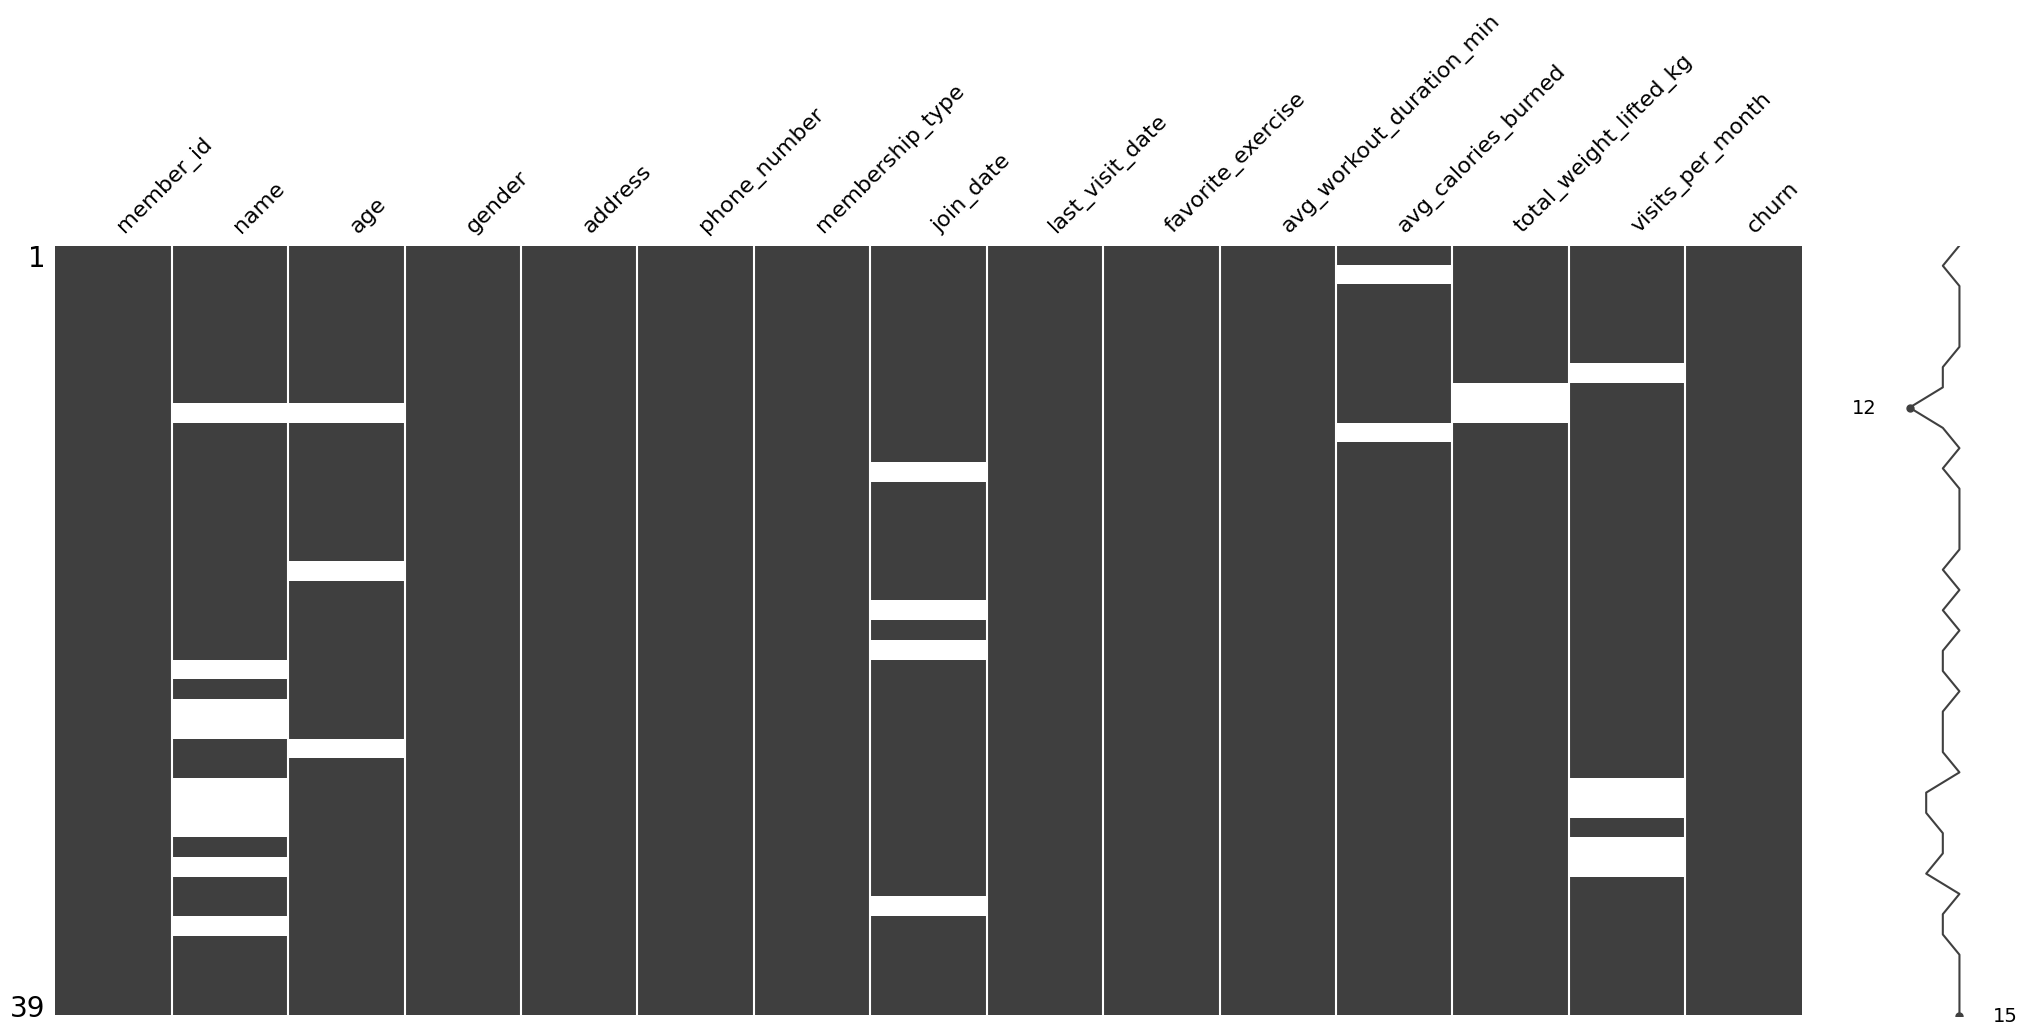

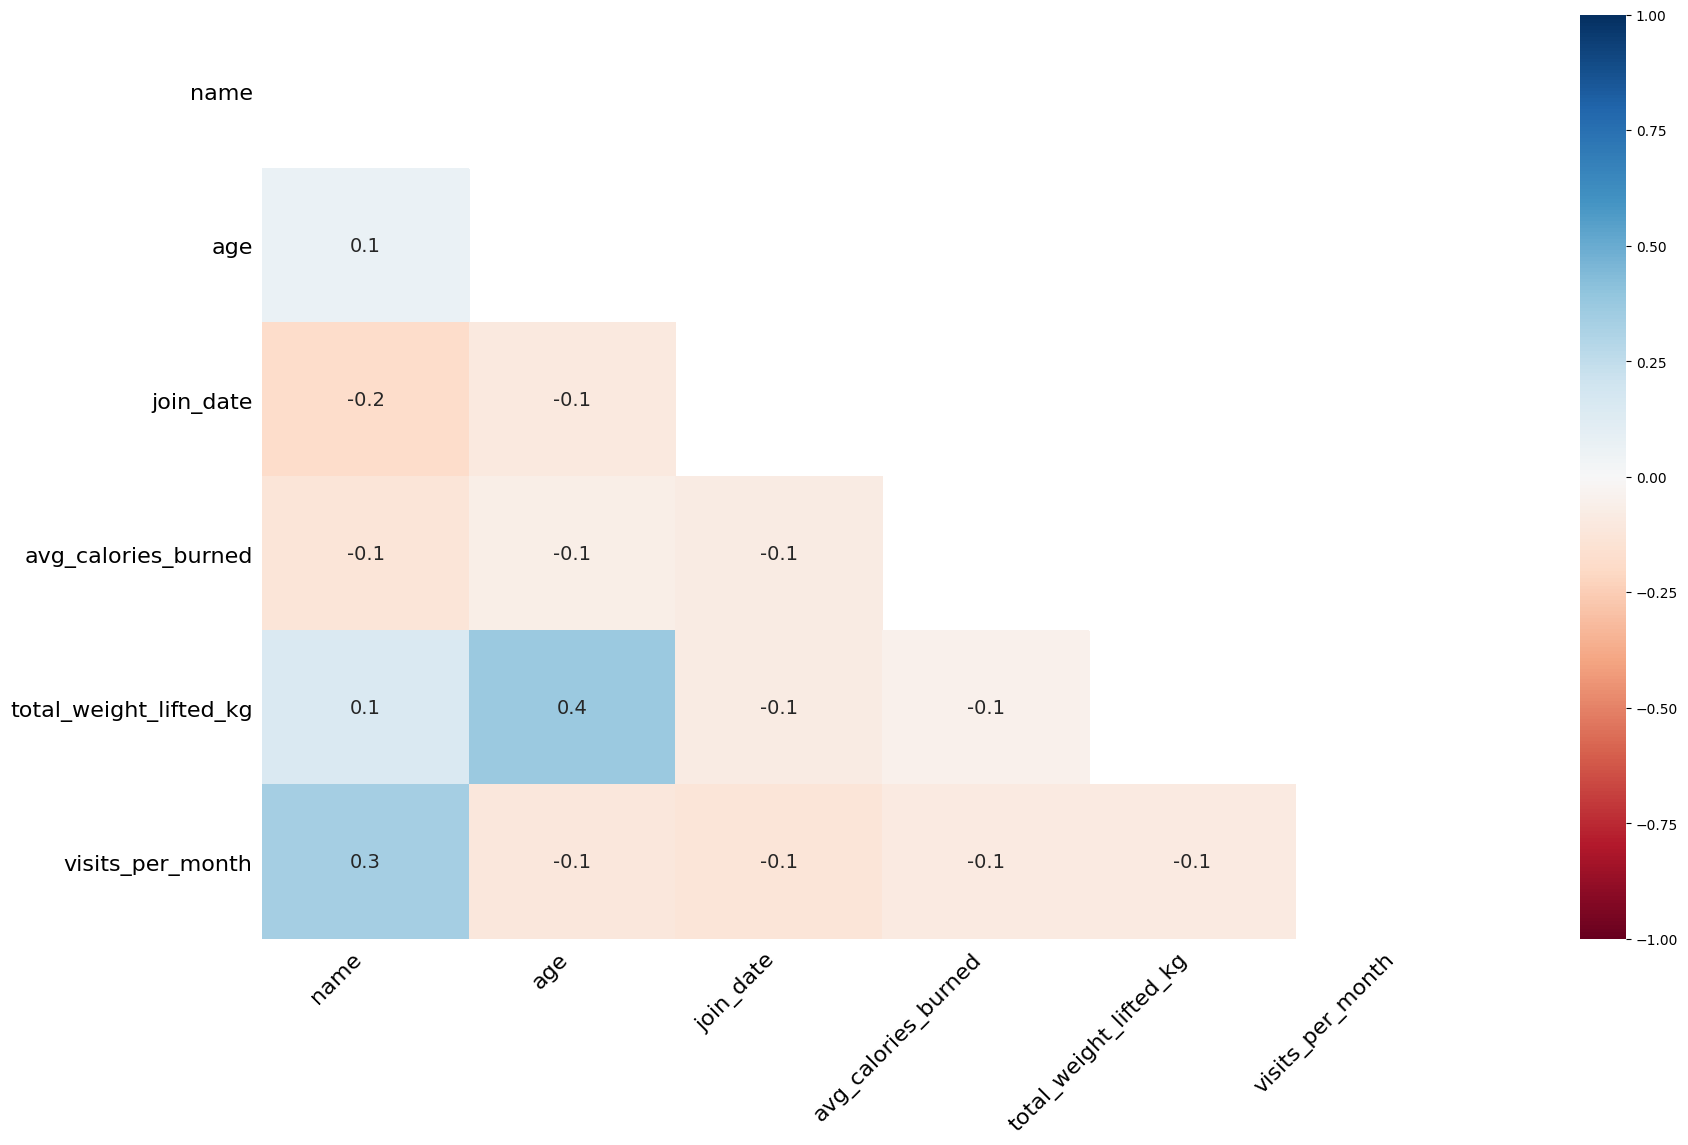

In [ ]:
msno.matrix(df_former)
msno.heatmap(df_former)
plt.show()

По полученным результатам можно сделать вывод о том, что пропуски в данных являются случайными и в т.ч. не связаны с уходом клиента из клуба. 

В столбцах `avg_calories_burned`, `total_weight_lifted_kg`,`visits_per_month` можно заменить пропуски нулями, в столбце `name` - заменить на 'Unknown', в `age` и `join_date` заменить на индикатор.

In [ ]:
df[['avg_calories_burned','total_weight_lifted_kg','visits_per_month']]=df[['avg_calories_burned','total_weight_lifted_kg','visits_per_month']].fillna(0)

In [ ]:
df['name']=df['name'].fillna('Unknown')

In [ ]:
#заменим пропуски на индикатор
df['age']=df['age'].fillna(-1)

In [ ]:
#проверим, какое минимальное значение join_date встречается в данных
df.join_date.min()

Timestamp('2022-01-09 00:00:00')

In [ ]:
#заменим на индикатор
df['join_date']=df['join_date'].fillna('2000-01-01')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   member_id                 150 non-null    int64         
 1   name                      150 non-null    object        
 2   age                       150 non-null    float64       
 3   gender                    150 non-null    object        
 4   address                   150 non-null    object        
 5   phone_number              150 non-null    object        
 6   membership_type           150 non-null    object        
 7   join_date                 150 non-null    datetime64[ns]
 8   last_visit_date           150 non-null    datetime64[ns]
 9   favorite_exercise         150 non-null    object        
 10  avg_workout_duration_min  150 non-null    int64         
 11  avg_calories_burned       150 non-null    float64       
 12  total_weight_lifted_kg

Полученный датасет очищен от пропусков, количество строк сохранено.

## Анализ дубликатов


In [ ]:
df.duplicated().sum()

0

Явные дубликаты в датасете отсутствуют. Проверим уникальные значения в категорийных столбцах, а также являются ли номера телефонов и `member_id` уникальными - для поиска неявных дубликатов. 


Проверим, являются ли номера телефонов и `member_id` уникальными.

In [ ]:
df['member_id'].value_counts(ascending=False).head()

member_id
1     1
95    1
97    1
98    1
99    1
Name: count, dtype: int64

In [ ]:
df['phone_number'].value_counts(ascending=False).head()

phone_number
032-51510359    1
036-48690892    1
036-34035954    1
039-19044862    1
037-75353714    1
Name: count, dtype: int64

In [ ]:
df['gender'].unique()

array(['Male', 'Female'], dtype=object)

In [ ]:
df['membership_type'].unique()

array(['Quarterly', 'Monthly', 'Yearly'], dtype=object)

In [ ]:
df['favorite_exercise'].unique()

array(['Pull-ups', 'Squats', 'Bench Press', 'Deadlift', 'Treadmill',
       'Cycling'], dtype=object)

In [ ]:
df[df['name']!='Unknown'][df[df['name']!='Unknown'].duplicated(subset=['name'], keep=False)].sort_values(by='name')

,member_id,name,age,gender,address,phone_number,membership_type,join_date,last_visit_date,favorite_exercise,avg_workout_duration_min,avg_calories_burned,total_weight_lifted_kg,visits_per_month,churn
67,68,Farah,50.0,Female,"Street 105, City 39",036-13395965,Monthly,2024-05-22,2025-03-13,Cycling,93,267.0,13698.0,15.0,False
83,84,Farah,40.0,Female,"Street 139, City 46",038-25232035,Monthly,2023-04-21,2024-01-13,Treadmill,109,486.0,1763.0,22.0,False
98,99,Jamila,-1.0,Female,"Street 82, City 35",037-75353714,Monthly,2022-05-10,2022-12-07,Treadmill,61,372.0,5239.0,12.0,False
117,118,Jamila,52.0,Female,"Street 9, City 28",035-33595674,Monthly,2024-04-20,2025-03-13,Treadmill,54,689.0,5379.0,12.0,False
32,33,Kanwal,-1.0,Female,"Street 157, City 43",039-47145814,Monthly,2024-08-19,2024-10-04,Bench Press,33,0.0,8167.0,19.0,False
102,103,Kanwal,-1.0,Female,"Street 69, City 46",035-36522672,Monthly,2022-12-11,2023-01-18,Bench Press,75,718.0,3067.0,18.0,False
15,16,Laraib,49.0,Female,"Street 8, City 38",033-94385113,Quarterly,2024-01-12,2024-03-02,Treadmill,86,542.0,11803.0,20.0,False
111,112,Laraib,23.0,Female,"Street 33, City 5",034-66899682,Monthly,2023-03-05,2023-10-23,Bench Press,48,778.0,8427.0,11.0,False
51,52,Nadia,43.0,Female,"Street 101, City 35",034-65816212,Monthly,2022-05-14,2022-07-19,Treadmill,78,390.0,15221.0,11.0,False
118,119,Nadia,50.0,Female,"Street 181, City 33",038-43263522,Monthly,2000-01-01,2024-04-18,Bench Press,59,465.0,4464.0,11.0,False


Делаем вывод об отсутствии неявных дубликатов. Повторяющиеся значения по столбцу с именем не являются дубликатами, поскольку эти клиенты все не относятся к ушедшим, а также имеют разный возраст, город, номера телефонов.